<a href="https://colab.research.google.com/github/jeisteve999/Alura.practice/blob/main/Sales_%26_Business_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [22]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [23]:
tienda['Tienda'] = 'Tienda 1'
tienda['Tienda'] = 'Tienda 2'
tienda['Tienda'] = 'Tienda 3'
tienda['Tienda'] = 'Tienda 4'




In [24]:
# Uniendo las tiendas en un dataframe
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 4
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 4
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 4
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 4
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 4


In [25]:
print(id(tienda))
print(id(tienda2))
print(id(tienda3))
print(id(tienda4))

tienda.shape, tienda2.shape, tienda3.shape, tienda4.shape


140314914139280
140314912311536
140315026126464
140315026126512


((2359, 13), (2359, 12), (2359, 12), (2358, 12))

In [26]:
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

dfs = []

for i, url in enumerate(urls, start=1):
    df_temp = pd.read_csv(url)
    df_temp['Tienda'] = f'Tienda {i}'
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)

In [27]:
df.shape
df['Tienda'].value_counts()

,count
Tienda,
Tienda 1,2359
Tienda 2,2359
Tienda 3,2359
Tienda 4,2358


In [28]:
# Facturacion total por tienda

facturacion_por_tienda = (
    df.groupby('Tienda')['Precio']
    .sum()
    .reset_index().rename(columns={'Precio': 'Facturacion Total'})
)

facturacion_por_tienda

,Tienda,Facturacion Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


In [29]:
df['Tienda'].value_counts()

,count
Tienda,
Tienda 1,2359
Tienda 2,2359
Tienda 3,2359
Tienda 4,2358


In [30]:
facturacion_por_tienda = facturacion_por_tienda.sort_values(by= 'Facturacion Total', ascending=False)

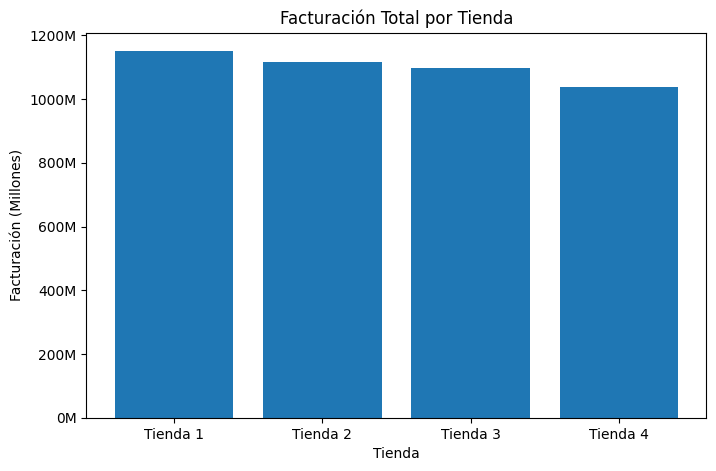

In [31]:
# Grafica

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8,5))
plt.bar(
    facturacion_por_tienda['Tienda'],
    facturacion_por_tienda['Facturacion Total']
)

plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación (Millones)')

formatter = FuncFormatter(lambda x, _: f'{x/1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# 2. Ventas por categoría

In [32]:
ventas_categoria = (df.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de ventas'))
ventas_categoria.head()

,Tienda,Categoría del Producto,Cantidad de ventas
0,Tienda 1,Artículos para el hogar,171
1,Tienda 1,Deportes y diversión,284
2,Tienda 1,Electrodomésticos,312
3,Tienda 1,Electrónicos,448
4,Tienda 1,Instrumentos musicales,182


In [33]:
ventas_categoria.sort_values(['Tienda', 'Cantidad de ventas'],ascending=[True, False]).head(10)

,Tienda,Categoría del Producto,Cantidad de ventas
7,Tienda 1,Muebles,465
3,Tienda 1,Electrónicos,448
5,Tienda 1,Juguetes,324
2,Tienda 1,Electrodomésticos,312
1,Tienda 1,Deportes y diversión,284
4,Tienda 1,Instrumentos musicales,182
6,Tienda 1,Libros,173
0,Tienda 1,Artículos para el hogar,171
15,Tienda 2,Muebles,442
11,Tienda 2,Electrónicos,422


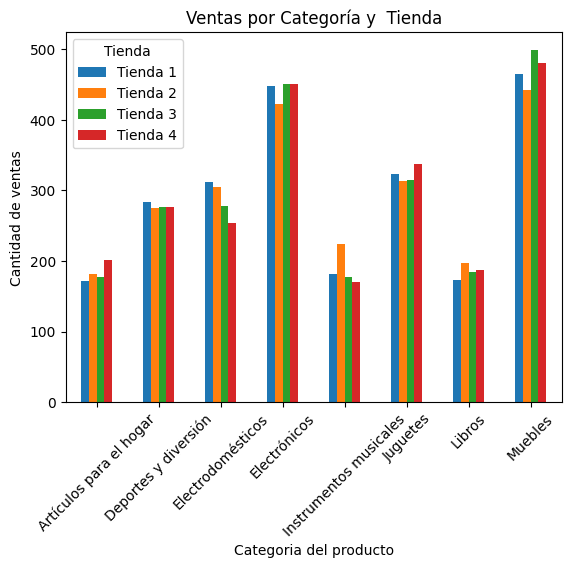

In [34]:
import matplotlib.pyplot as plt

ventas_pivot = ventas_categoria.pivot(index='Categoría del Producto', columns = 'Tienda', values='Cantidad de ventas')
ventas_pivot.plot(kind='bar')

plt.title('Ventas por Categoría y  Tienda')
plt.xlabel('Categoria del producto')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.show()

# 3. Calificación promedio de la tienda


In [35]:
calificacion_tienda = (
    df.groupby('Tienda')['Calificación']
    .mean()
    .reset_index()
    .rename(columns={'Calificación': 'Calificación Promedio'})
)

calificacion_tienda

,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


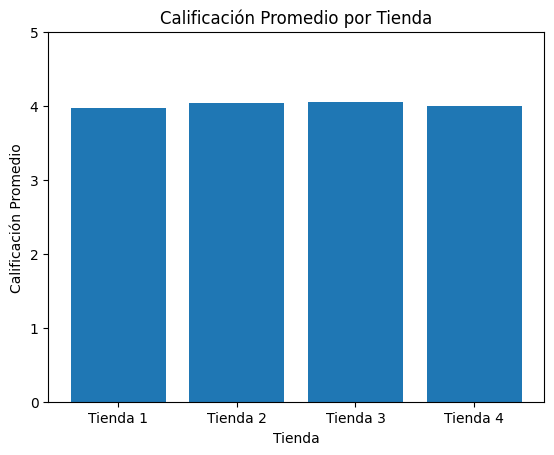

In [36]:
# Grafico

import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    calificacion_tienda['Tienda'],
    calificacion_tienda['Calificación Promedio']
)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.show()

# 4. Productos más y menos vendidos

In [37]:
# Ventas por producto y tienda

ventas_producto = (df.groupby(['Tienda', 'Producto'])).size().reset_index(name='Cantidad de ventas')
ventas_producto.head()

,Tienda,Producto,Cantidad de ventas
0,Tienda 1,Ajedrez de madera,49
1,Tienda 1,Armario,60
2,Tienda 1,Asistente virtual,40
3,Tienda 1,Auriculares,50
4,Tienda 1,Auriculares con micrófono,33


In [38]:
# Producto MÁS vendido por tienda

producto_mas_vendido=(ventas_producto.sort_values(['Tienda', 'Cantidad de ventas'], ascending=[True, False]).groupby('Tienda').head(1))
producto_mas_vendido

,Tienda,Producto,Cantidad de ventas
1,Tienda 1,Armario,60
75,Tienda 2,Iniciando en programación,65
129,Tienda 3,Kit de bancas,57
163,Tienda 4,Cama box,62


In [39]:
producto_menos_vendido=(ventas_producto.sort_values(['Tienda', 'Cantidad de ventas'], ascending=[True, True]).groupby('Tienda').head(1))
producto_menos_vendido

,Tienda,Producto,Cantidad de ventas
4,Tienda 1,Auriculares con micrófono,33
77,Tienda 2,Juego de mesa,32
111,Tienda 3,Bloques de construcción,35
175,Tienda 4,Guitarra eléctrica,33


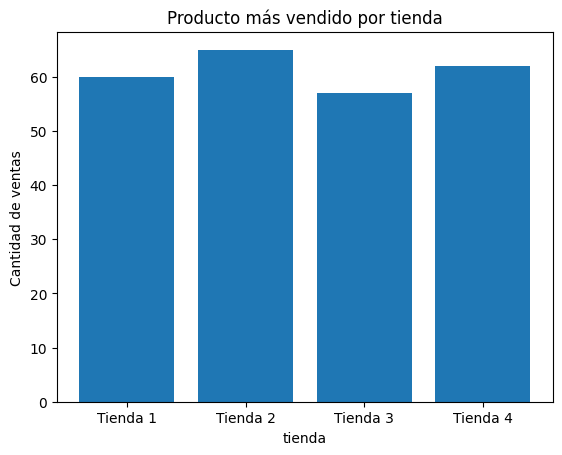

In [40]:
# Grafico

plt.figure()
plt.bar(
    producto_mas_vendido['Tienda'],
    producto_mas_vendido['Cantidad de ventas']
)
plt.title('Producto más vendido por tienda')
plt.xlabel('tienda')
plt.ylabel('Cantidad de ventas')
plt.show()


# 5. Envío promedio por tienda

---



In [41]:
envio_promedio_df = pd.DataFrame({'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], 'Envio promedio':[tienda['Costo de envío'].mean(), tienda2['Costo de envío'].mean(), tienda3['Costo de envío'].mean(), tienda4['Costo de envío'].mean(),]})

envio_promedio_df


,Tienda,Envio promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


## Análisis final

##Facturación

# El análisis de la facturación total evidencia que la tienda con mayor facturación fue Tienda 1, con un total de 1.150.880.000, mientras que la tienda con menor facturación fue Tienda 4, con 1.038.376.000. Por otra parte, se identificó que la segunda tienda con mayor facturación fue Tienda 2, con un total de 1.116.344.000. Estos resultados permiten identificar a la Tienda 1 como la principal generadora de ingresos dentro del conjunto analizado.

## Ventas por categoría

# El análisis de las ventas por categoría arrojó diferencias en la distribución de los productos vendidos entre las tiendas. Se observa que cada tienda cuenta con una categoría líder en ventas, lo que evidencia preferencias diferenciadas por parte de los clientes. En particular, las categorías más vendidas fueron:

#Tienda 1: Deportes y diversión (284 ventas)

#Tienda 2: Electrodomésticos (312 ventas)

#Tienda 3: Electrónicos (448 ventas)

#Tienda 4: Instrumentos musicales (182 ventas)

#Estos resultados indican una mayor demanda en dichas categorías y reflejan distintos niveles de especialización, diversificación y desempeño comercial entre las tiendas. Esta información resulta clave para evaluar la eficiencia de cada tienda y su aporte al negocio.

##Calificación promedio de la tienda

#En cuanto a la calificación promedio, se observa que todas las tiendas presentan valoraciones cercanas a 4 sobre 5, lo que indica un alto nivel general de satisfacción por parte de los clientes. Cabe destacar que Tienda 3 registra la mejor calificación promedio con 4.05, lo que sugiere una experiencia de compra más consistente y mejor percibida. Tienda 2 le sigue muy de cerca con una calificación de 4.04, manteniéndose igualmente en un nivel alto de satisfacción.

#Por su parte, Tienda 4 presenta una calificación promedio de 4.00, lo que indica una valoración positiva, aunque con margen de mejora frente a las tiendas líderes. Finalmente, Tienda 1 obtiene la calificación promedio más baja con 3.98; no obstante, este valor sigue estando cerca del umbral de satisfacción alta, lo que sugiere que los clientes se encuentran mayormente conformes, aunque podrían existir aspectos específicos por optimizar.

#En general, las diferencias entre las calificaciones son relativamente pequeñas, lo que evidencia una experiencia del cliente bastante homogénea entre las tiendas. Sin embargo, Tienda 3 y Tienda 2 destacan levemente, pudiendo servir como referencia para la adopción de buenas prácticas en las demás tiendas.

##Productos más y menos vendidos

#Respecto al análisis de los productos, se identificó que el producto más vendido fueron los armarios, con un total de 60 unidades vendidas en la Tienda 1, lo que indica una alta aceptación en el mercado y una buena rotación. En contraste, el producto menos vendido fueron los juegos de mesa, con 32 unidades vendidas en la Tienda 2, lo que sugiere una menor demanda y posibles oportunidades de mejora relacionadas con su estrategia de comercialización, tales como ajustes de precio, promociones o reposicionamiento dentro del catálogo.

##Costo promedio de envío por tienda

#Finalmente, el análisis del costo promedio de envío muestra que Tienda 1 presenta el costo más alto, con un valor de 26.018,61, lo cual podría estar asociado a factores como mayor distancia de entrega, volumen de pedidos o acuerdos logísticos específicos, afectando potencialmente la decisión de compra de los clientes. Por el contrario, Tienda 4 registra el costo promedio de envío más bajo, con 23.459,46, lo que evidencia una mayor eficiencia logística y mejores condiciones de envío, representando una ventaja competitiva frente a las demás tiendas.



#Se recomienda priorizar a la Tienda 3, ya que presenta el mejor desempeño integral entre las tiendas analizadas. Esta tienda destaca por:

#Tener una de las facturaciones más altas, muy cercana a la líder.

#Registrar la mejor calificación promedio (4.05), lo que evidencia una excelente experiencia del cliente.

#Liderar las ventas por categoría en Electrónicos (448 ventas), lo que indica alta demanda y buena rotación de productos.

#Mantener un equilibrio sólido entre ventas, satisfacción del cliente y desempeño comercial.

#Aunque sus costos de envío no son los más bajos, su alto nivel de ventas y satisfacción sugiere que los clientes perciben un alto valor, compensando dicho costo. Por ello, la Tienda 3 representa la opción más sólida y sostenible a largo plazo.

#cabe destacar que se puede considerar a la Tienda 4, especialmente desde una perspectiva de optimización de costos, ya que:

#Presenta el costo promedio de envío más bajo, lo que constituye una ventaja competitiva.

#Mantiene una calificación positiva (4.00), cercana al promedio general.

#Puede resultar atractiva para clientes sensibles al precio del envío.

#No obstante, su menor facturación sugiere que aún tiene margen para fortalecer su desempeño comercial.